# Machine Learning COMP2002 CW2 Coursework

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

# 1.1 Data preparation

In [4]:
data = pandas.read_csv("glass_dataset.csv")
# Inputs is features, Data is the whole dataset, Targets is the labels
targets = data["Type"] # Label of the type of glass (1-7)
inputs = data.drop("Type", axis=1) # Features of the glass

In [5]:
print(data.head())  
print(data.columns)  
print(inputs.isnull().sum())  # Ensure no missing values
print("targets", targets)
print("inputs", inputs)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64
targets 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64
inputs           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  

# 1.2 Classifcation 

In [347]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
compressed = PCA(n_components=2).fit_transform(scaled_inputs) # given it has 9 features, higher dimensions might be useful

## Neighbours

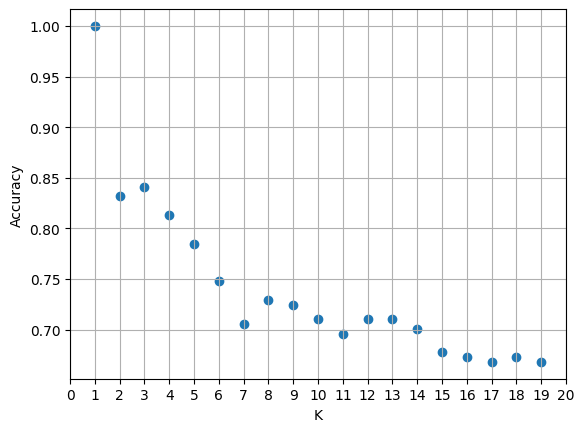

In [218]:
k_range = range (1,20)
scores = []
for k in k_range :
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit (scaled_inputs,targets)
    scores.append (knn.score(scaled_inputs,targets))
plt.figure()
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.scatter(k_range,scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.grid(True)
plt.savefig ("knn_neighbours.png", bbox_inches ="tight")
plt.show()

In [219]:
k_classifier = KNeighborsClassifier(n_neighbors=1).fit(scaled_inputs,targets)
classified_data = k_classifier.predict(scaled_inputs)

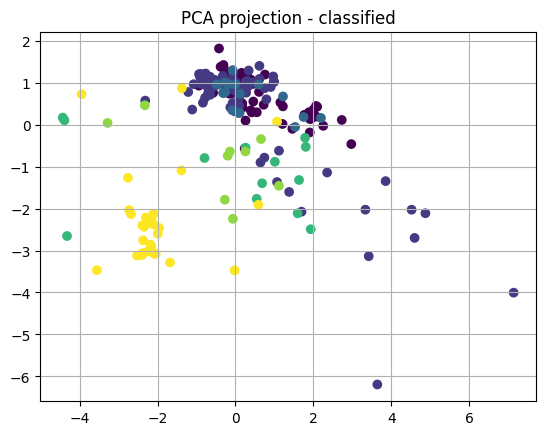

In [220]:
plt.figure()
plt.scatter(compressed [:,0], compressed [:,1], c=classified_data, cmap='viridis')
plt.title("PCA projection - classified")
plt.grid(True)
plt.savefig("glass_pca_classified.png", bbox_inches ="tight")
plt.show()


## SVM 

In [376]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) # given it has 9 features, higher dimensions might be useful
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)

### Kernel

In [377]:
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

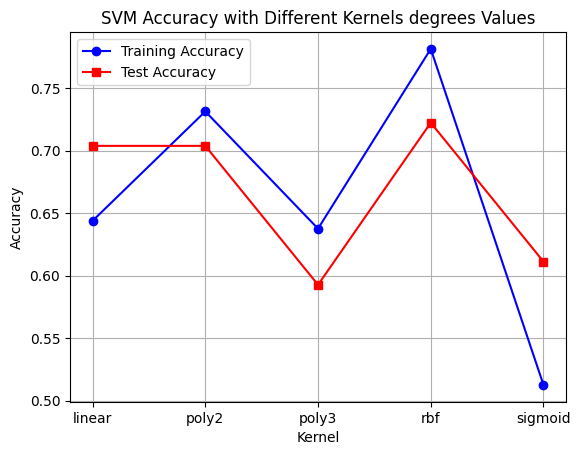

In [378]:
plt.figure()
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.title("SVM Accuracy with Different Kernels degrees Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_4.png", bbox_inches="tight")
plt.show()

### Gamma

In [379]:
gamma_range = np.linspace(0.1, 4.0,40)
training_scores = []
test_scores = []
for g in gamma_range:
    svm_classifier = SVC(kernel="rbf", gamma=g).fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))


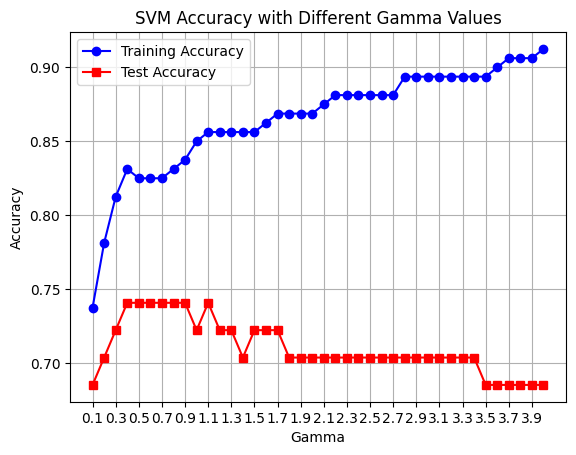

In [380]:
plt.figure()
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.plot(gamma_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(gamma_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(np.round(gamma_range, 2)[::2])  
plt.title("SVM Accuracy with Different Gamma Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_gamma.png", bbox_inches="tight")
plt.show()

### Regularization C

In [354]:
c_range = np.linspace(0.1, 2.0,20)
training_scores = []
test_scores = []
for c in c_range:
    svm_classifier = SVC(kernel="rbf", gamma=1.1, C=c).fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))


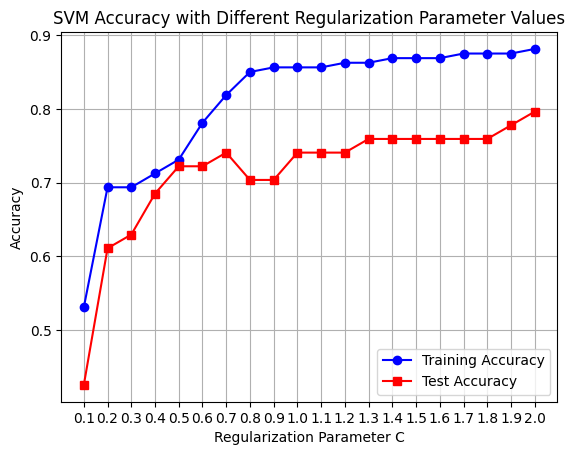

In [334]:
plt.figure()
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")
plt.plot(c_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(c_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(c_range)  
plt.title("SVM Accuracy with Different Regularization Parameter Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_regularization.png", bbox_inches="tight")
plt.show()

### Ceof0

In [163]:
ceof0_range = np.linspace(0.1, 3.5,20)
training_scores = []
test_scores = []
for c in ceof0_range:
    svm_classifier = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9, coef0=c).fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

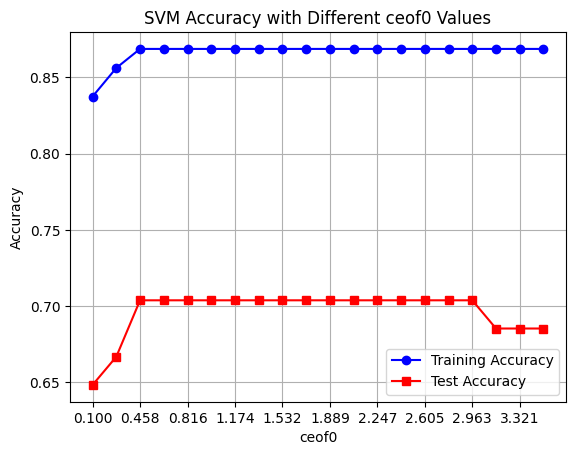

In [164]:
plt.figure()
plt.xlabel("ceof0")
plt.ylabel("Accuracy")
plt.plot(ceof0_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(ceof0_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(ceof0_range[::2])  
plt.title("SVM Accuracy with Different ceof0 Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_ceof0.png", bbox_inches="tight")
plt.show()

### Gridsearch

In [356]:
parameters = [
    {
        'kernel': ['poly'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale'],
        'degree': [2, 3],
        'coef0': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
    },
    {
        'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale']
    },
    {
        'kernel': ['linear'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100]
    }
]

grid = GridSearchCV(
    SVC(), # model
    parameters, #parameters to tune
    scoring='accuracy', #evaluation metric
    cv=5, #number of cross validation
    verbose=1, #  to print the progress
    n_jobs=-1  # how many cores to use in parallel
)

grid.fit(compressed, targets)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
# {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'} #found by grid search
# {'C': 0.5, 'coef0': 0.25, 'degree': 3, 'gamma': 2, 'kernel': 'poly'} #found by grid search
# svm_classifier_poly = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9).fit(x_train, t_train) #more generalised found by me


Fitting 5 folds for each of 2907 candidates, totalling 14535 fits
Best parameters: {'C': 10, 'coef0': 2, 'degree': 2, 'gamma': 0.75, 'kernel': 'poly'}
Best cross-validation score: 0.7014


In [373]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)# given it has 9 features, higher dimensions might be useful

### Conclusion of SVM

In [ ]:
# used with PCA 2
svm_classifier_poly_grid = SVC(kernel="poly",degree=3,gamma=2,C=0.5,coef0=0.25).fit(x_train, t_train) # potential overfitting but better than manual
#0.725 training accuracy, 0.6851851851851852 testing accuracy(pca 2)
#0.8 training accuracy, 0.7222222222222222 testing accuracy (pca 3)

svm_classifier_poly_manual = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9).fit(x_train, t_train) #potential underfitting, though still good
#0.61875 training accuracy, 0.7037037037037037 testing accuracy (pca 2)
#0.6875 training accuracy, 0.6851851851851852 testing accuracy (pca 3)

svm_classifier_rbf_grid = SVC(kernel="rbf", C=10, gamma=0.5).fit(x_train, t_train) # overfitting.
#0.75 training accuracy, 0.6481481481481481 testing accuracy (pca 2)
# 0.825 training accuracy, 0.6481481481481481 testing accuracy (pca 3)

y_train_poly_grid = svm_classifier_poly_grid.predict(x_train)
y_test_poly_grid = svm_classifier_poly_grid.predict(x_test)

y_train_poly_manual = svm_classifier_poly_manual.predict(x_train)
y_test_poly_manual = svm_classifier_poly_manual.predict(x_test)

y_train_rbf_grid = svm_classifier_rbf_grid.predict(x_train)
y_test_rbf_grid = svm_classifier_rbf_grid.predict(x_test)


train_accuracy_poly_grid = accuracy_score(t_train, y_train_poly_grid)
test_accuracy_poly_grid = accuracy_score(t_test, y_test_poly_grid)
print(f"Polynomial kernel Grid: {train_accuracy_poly_grid} training accuracy, {test_accuracy_poly_grid} testing accuracy")

train_accuracy_poly_manual = accuracy_score(t_train, y_train_poly_manual)
test_accuracy_poly_manual = accuracy_score(t_test, y_test_poly_manual)
print(f"Polynomial kernel Manual: {train_accuracy_poly_manual} training accuracy, {test_accuracy_poly_manual} testing accuracy")

# Calculate accuracy for RBF kernel
train_accuracy_rbf_grid = accuracy_score(t_train, y_train_rbf_grid)
test_accuracy_rbf_grid = accuracy_score(t_test, y_test_rbf_grid)
print(f"RBF kernel Grid: {train_accuracy_rbf_grid} training accuracy, {test_accuracy_rbf_grid} testing accuracy")


In [372]:
svm_classifier_manual = SVC(kernel="rbf",gamma=1.1,C=2.0).fit(x_train, t_train) 
# Best parameters: {'C': 10, 'coef0': 2, 'degree': 2, 'gamma': 0.75, 'kernel': 'poly'}
svm_classifier_poly_grid = SVC(kernel="poly",degree=2,gamma=0.75,C=2,coef0=0.5).fit(x_train, t_train)

y_train_poly_manual = svm_classifier_poly_manual.predict(x_train)
y_test_poly_manual = svm_classifier_poly_manual.predict(x_test)

train_accuracy_poly_manual = accuracy_score(t_train, y_train_poly_manual)
test_accuracy_poly_manual = accuracy_score(t_test, y_test_poly_manual)
print(f"RBF kernel Manual: {train_accuracy_poly_manual} training accuracy, {test_accuracy_poly_manual} testing accuracy")

y_train_poly_grid = svm_classifier_poly_grid.predict(x_train)
y_test_poly_grid = svm_classifier_poly_grid.predict(x_test)

train_accuracy_poly_grid = accuracy_score(t_train, y_train_poly_grid)
test_accuracy_poly_grid = accuracy_score(t_test, y_test_poly_grid)
print(f"Polynomial kernel Grid: {train_accuracy_poly_grid} training accuracy, {test_accuracy_poly_grid} testing accuracy")



RBF kernel Manual: 0.7875 training accuracy, 0.6666666666666666 testing accuracy
Polynomial kernel Grid: 0.85625 training accuracy, 0.7222222222222222 testing accuracy


## Imports 

## 1.3 Assessment of classification